In [1]:
import tensorflow as tf
from tensorflow.keras import layers
import pandas as pd
import numpy as np

# load data

In [2]:
data = pd.read_csv("HIGGS.csv", header=None)

MemoryError: 

In [3]:
labels = data[0]
data = data.iloc[:,1:28]

In [4]:
# Input features were standardized over the entire train/test set with mean zero and standard deviation one
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

In [5]:
# pull out last 500000 observations as test set (this is the 500000 used by the authors for testing)
test_data = scaled_data[-500000:,:]
test_labels = labels[-500000:]
test_labels = test_labels.values

# prepare training data, cut data before test set
train_data = scaled_data[:scaled_data.shape[0] - 500000,:]
train_labels = labels[:data.shape[0] - 500000]
train_labels = train_labels.values

# model

We selected a five-layer neural network with 300 hidden units in each layer, a learning rate of 0.05, and a weight decay coefficient of 1 × 10^−5.

In [2]:
model = tf.keras.Sequential()

model.add(layers.Dense(300, activation='tanh'))
model.add(layers.Dense(300, activation='tanh'))
model.add(layers.Dense(300, activation='tanh'))
model.add(layers.Dense(300, activation='tanh'))
model.add(layers.Dense(300, activation='tanh'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=tf.keras.optimizers.SGD(lr=0.05, decay=0.00001), loss='mean_squared_error', metrics=['mean_squared_error'])

In [3]:
from keras.utils import plot_model
plot_model(model, to_file='paperModel.png')

Using TensorFlow backend.


OSError: `pydot` failed to call GraphViz.Please install GraphViz (https://www.graphviz.org/) and ensure that its executables are in the $PATH.

In [20]:
model.fit(train_data, train_labels, validation_split=.25, epochs=3, batch_size=50000)

Train on 7875000 samples, validate on 2625000 samples
Epoch 1/3
7875000/7875000 [==============================] - 397s 50us/sample - loss: 0.2223 - mean_squared_error: 0.2223 - val_loss: 0.2212 - val_mean_squared_error: 0.2212
Epoch 2/3
7875000/7875000 [==============================] - 495s 63us/sample - loss: 0.2201 - mean_squared_error: 0.2201 - val_loss: 0.2193 - val_mean_squared_error: 0.2193
Epoch 3/3
7875000/7875000 [==============================] - 543s 69us/sample - loss: 0.2196 - mean_squared_error: 0.2196 - val_loss: 0.2186 - val_mean_squared_error: 0.2186


In [21]:
predictions = model.predict(test_data)

In [22]:
from sklearn import metrics

fpr, tpr, thresholds = metrics.roc_curve(test_labels, predictions)
roc_auc = metrics.auc(fpr, tpr)

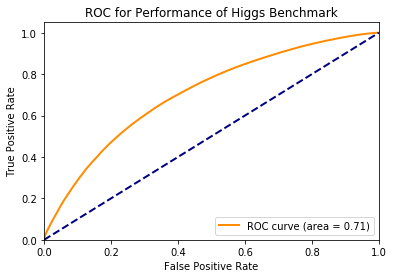

In [23]:
import matplotlib.pyplot as plt

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for Performance of Higgs Benchmark')
plt.legend(loc="lower right")
plt.show()

In [ ]:
model_name = "HIGGS_model_final.h5"

save_dir = os.path.join(os.getcwd(), 'saved_models')

if not os.path.isdir(save_dir):
    os.makedirs(save_dir)

model_path = os.path.join(save_dir, model_name)

model.save(model_path)
print('Saved trained model at %s ' % model_path)